In [4]:
from sklearn import datasets
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 300
X,y = datasets.make_moons(N,noise=0.3)

In [30]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [25]:
#グラフで表示するため、Xの行と列を入れ替え
x = X.transpose()
x.shape

(2, 300)

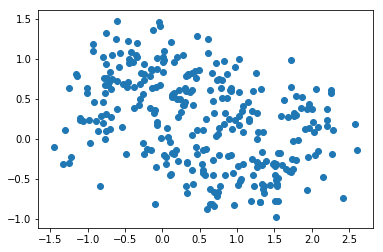

In [26]:
plt.scatter(x[0],x[1])

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
Y = y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)
Y.shape

C:\Users\jfjfa\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(300, 1)

In [32]:
num_hidden = 3

x = tf.placeholder(tf.float32, shape=[None,2])#入力データ
t = tf.placeholder(tf.float32, shape=[None,1])#出力データ

#入力層ー隠れ層2→3
W = tf.Variable(tf.truncated_normal([2,num_hidden]))#重み2*3
b = tf.Variable(tf.zeros([num_hidden]))#バイアス3
h = tf.nn.sigmoid(tf.matmul(x,W) + b)

#隠れ層ー出力層3→1
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h,V) + c)

cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [33]:
#correnct_predictionはfeed_dictで与えたデータ分の結果を返すので、tf.reduce_meanで平均値をとれば、あっていた数/全データ数が得られる。
#ただし、correct_predictionはブール型を返すので、tf.cast()により浮動小数点に変換し、数値計算できるようにしている。
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [34]:
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x:X_[start:end],
            t:Y_[start:end]
        })

In [35]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x:X_test,
    t:Y_test
})
print('accuracy: ' , accuracy_rate)

accuracy:  0.916667
